# Image Processing Lab07

## Setup

In [ ]:
!apt update && apt install -y ffmpeg libsm6 libxext6
!pip install tensorflow
!pip install opencv-python

Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 http://deb.debian.org/debian buster-updates InRelease [51.9 kB]
Get:3 http://security.debian.org/debian-security buster/updates InRelease [65.4 kB]
Get:4 http://deb.debian.org/debian buster/main amd64 Packages [7,906 kB]
Get:5 http://deb.debian.org/debian buster-updates/main amd64 Packages [8,792 B]
Get:6 http://security.debian.org/debian-security buster/updates/main amd64 Packages [316 kB]
Fetched 8,470 kB in 2s (4,783 kB/s)



10 packages can be upgraded. Run 'apt list --upgradable' to see them.



libsm6 is already the newest version (2:1.2.3-1).
libsm6 set to manually installed.
libxext6 is already the newest version (2:1.3.3-1+b2).
libxext6 set to manually installed.
The following additional packages will be installed:
  i965-va-driver intel-media-va-driver libaacs0 libaom0 libasound2
  libasound2-data libass9 libasyncns0 libavc1394-0 libavcodec58 libavdevice58
  libavfilter7 libavformat58 libavresample4 libavutil5

## Import

In [ ]:
import numpy as np
import cv2 as cv
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

## 7.1 Effects of Interpolation techniques in Image Resizing

In [ ]:
# Read Image File
grid_image = cv.imread("Grid_Image.JPG")
img = cv.imread("img1.jpg")

grid_image = cv.cvtColor(grid_image, cv.COLOR_BGR2RGB)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, channels = grid_image.shape
print(height, width)

363 358


In [ ]:
# Define resize factor
Reduce_factors = [2,7,15] # อย่างน้อย 3 ค่า
Scale_factors = [1/factor for factor in Reduce_factors]

# Define interpolation method
inter_methods = [cv.INTER_NEAREST,cv.INTER_LINEAR,cv.INTER_CUBIC,cv.INTER_AREA]
method_names = ["INTER_NEAREST" , "INTER_LINEAR" , "INTER_CUBIC" , "INTER_AREA"]

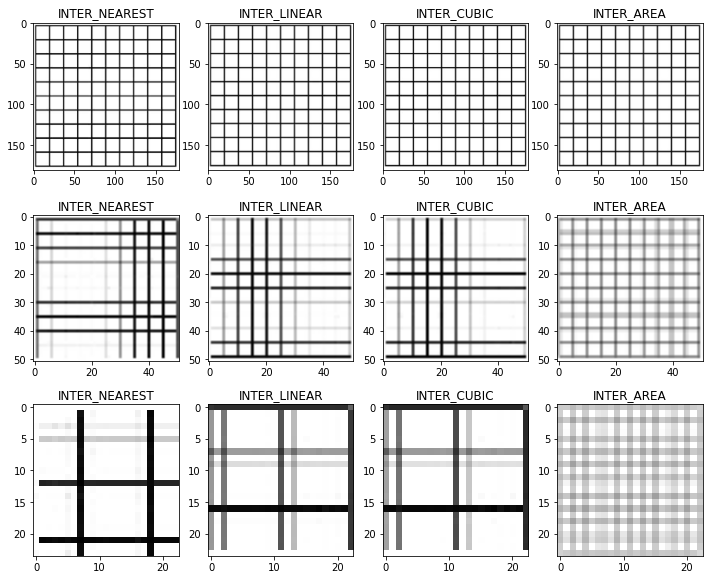

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(12, 10))

for i in range(3):
    for j in range(4):
        new_size = (int(width*Scale_factors[i]), int(height*Scale_factors[i]))
        resized_img = cv.resize(grid_image, dsize=new_size, interpolation=inter_methods[j])
        ax[i, j].set_title(method_names[j])
        ax[i, j].imshow(resized_img)

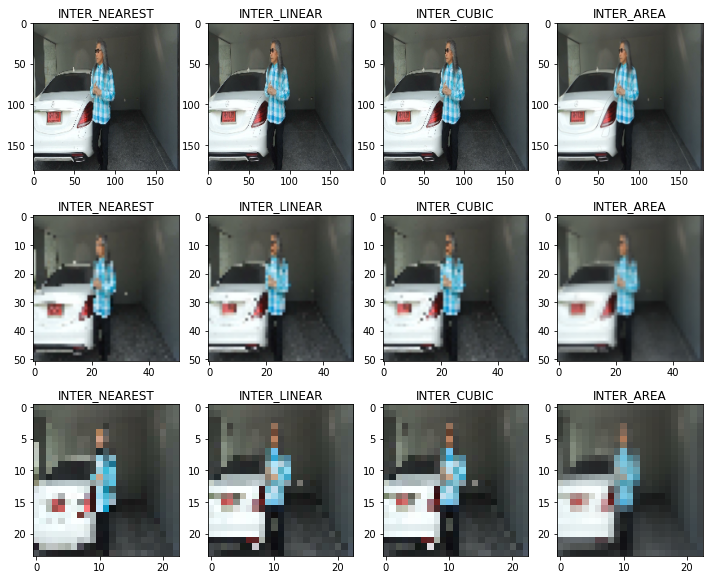

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(12, 10))

for i in range(3):
    for j in range(4):
        new_size = (int(width*Scale_factors[i]), int(height*Scale_factors[i]))
        resized_img = cv.resize(img, dsize=new_size, interpolation=inter_methods[j])
        ax[i, j].set_title(method_names[j])
        ax[i, j].imshow(resized_img)

## 7.2 Image Augmentation using Keras ImageDataGenerator

In [ ]:
#Read image file
img = cv.imread("img1.jpg")
height, width, channels = img.shape
print(height, width, channels)

img = np.reshape(img, (1, height, width, channels))
print(img.shape)

720 1280 3
(1, 720, 1280, 3)


In [ ]:
# Define fill method
fill_method = ['constant', 'nearest', 'reflect', 'wrap']

Npic = 5
rotation_range = 20
width_shift_range = 0.2
height_shift_range = 0.2
shear_range = 0.2
zoom_range = 0.2
horizontal_flip = True

In [ ]:
fourcc = cv.VideoWriter_fourcc('M', 'P', '4', 'V')
out = cv.VideoWriter("video.mp4", fourcc, 1, (1280, 720))

#Define ImageDataGenerator with parameters
for m in fill_method :
    datagen = ImageDataGenerator( rotation_range= rotation_range, 
                                width_shift_range= width_shift_range, 
                                height_shift_range= height_shift_range, 
                                shear_range= shear_range, 
                                zoom_range= zoom_range, 
                                horizontal_flip= horizontal_flip, 
                                fill_mode= m)

    # Creates our batch of one image
    pic = datagen.flow(img, batch_size=1)

    #Random generate transformed images and write to a video file
    for i in range(Npic) :
        batch = pic.next()
        im_result = batch[0].astype('uint8')
        out.write(im_result)

out.release()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=38200faa-545e-46b3-9015-4147d2da2205' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>